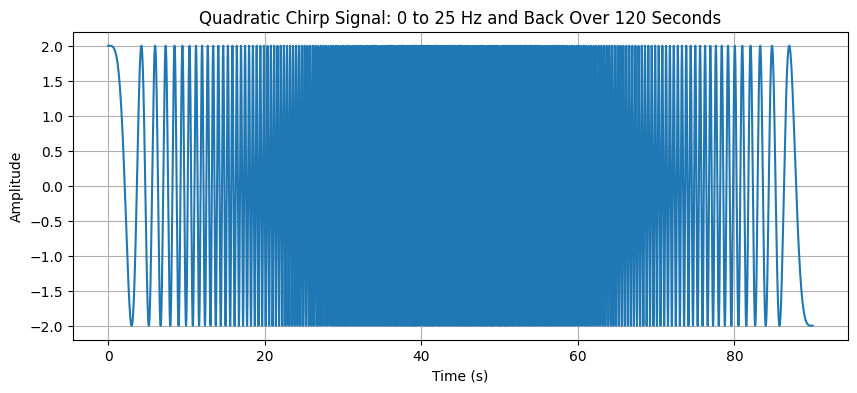

In [99]:
import numpy as np
import scipy.signal
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
fs = 200  # Sampling frequency in Hz (1 / 5ms = 200Hz)
duration = 90  # Duration of the signal in seconds
f0 = 0  # Start frequency of the chirp
f1 = 5  # End frequency of the chirp

# Adjusted duration for each phase (increasing and decreasing) to keep the overall duration the same
adjusted_duration = duration / 2

# Time arrays for each phase
t_up = np.arange(0, adjusted_duration, 1/fs)
t_down = np.arange(0, adjusted_duration, 1/fs)

# Generate the chirp signals for each phase
chirp_signal_up = scipy.signal.chirp(t_up, f0=f0, f1=f1, t1=adjusted_duration, method='linear')
chirp_signal_down = scipy.signal.chirp(t_down, f0=f1, f1=f0, t1=adjusted_duration, method='linear')

amplitude = 2
amplitude_envelope = np.linspace(f1/2, f1, len(t_up)) * amplitude
amplitude_envelope = np.concatenate([amplitude_envelope, amplitude_envelope[::-1]])

# Concatenate the up and down signals
chirp_signal_combined = np.concatenate([chirp_signal_up, chirp_signal_down]) * amplitude
t_combined = np.arange(0, duration, 1/fs)  # Adjusted time array for the combined signal

# Save the combined signal into a CSV file
units = 100/(0.113 * 12)

# Create DataFrame
df_chirp = pd.DataFrame({
    'time': t_combined,
    'q1_l': chirp_signal_combined * units,
    'q1_r': chirp_signal_combined * units,
    'q2_l': chirp_signal_combined * units,
    'q2_r': chirp_signal_combined * units
})
df_chirp.to_csv(f'chirp_ref_{amplitude}_{f1}.csv', index=False)

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t_combined, chirp_signal_combined)
plt.title('Quadratic Chirp Signal: 0 to 25 Hz and Back Over 120 Seconds')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

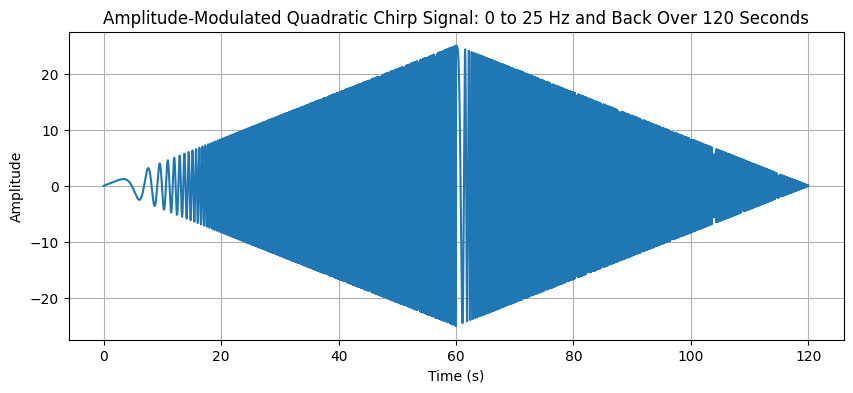

In [73]:
import numpy as np
import scipy.signal
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
fs = 200  # Sampling frequency in Hz (1 / 5ms)
duration = 120  # Total duration of the signal in seconds
f0 = 0  # Start frequency of the chirp
f1 = 25  # Peak frequency of the chirp

# Generate the time array for the whole duration
t = np.arange(0, duration, 1/fs)

# Generate the quadratic chirp signal
chirp_signal = scipy.signal.chirp(t, f0=f0, f1=f1, t1=duration/2, method='quadratic')
chirp_signal[len(t)//2:] = scipy.signal.chirp(t[len(t)//2:], f0=f1, f1=f0, t1=duration/2, method='quadratic')

# Generate an amplitude envelope that increases and then decreases with frequency
# The envelope is linearly proportional to the frequency at each point
amplitude_envelope = np.linspace(f0, f1, len(t)//2)
amplitude_envelope = np.concatenate([amplitude_envelope, amplitude_envelope[::-1]])

# Apply the amplitude envelope to the chirp signal
modulated_chirp_signal = chirp_signal * amplitude_envelope

# Save the modulated signal into a CSV file
signal_data = pd.DataFrame({'Time (s)': t, 'Signal': modulated_chirp_signal})
csv_file_path = 'modulated_chirp_signal_120s_quadratic.csv'
signal_data.to_csv(csv_file_path, index=False)

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t, modulated_chirp_signal)
plt.title('Amplitude-Modulated Quadratic Chirp Signal: 0 to 25 Hz and Back Over 120 Seconds')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [44]:
duration = 120
half_duration = duration / 2
fs = 25
# Generate a linearly increasing frequency for the first half
frequencies_first_half = np.linspace(start_freq, end_freq, int(half_duration * fs))

# Generate a linearly decreasing frequency for the second half
frequencies_second_half = np.linspace(end_freq, start_freq, int(half_duration * fs))

# Combine the two halves to form the full frequency sweep
frequencies_full = np.concatenate((frequencies_first_half, frequencies_second_half))

# Generate the time array for the full duration
t_full = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the chirp signal with varying frequency
chirp_signal_bidirectional_corrected = np.sin(2 * np.pi * np.cumsum(frequencies_full) / fs)

amplitudes = [1.0, 1.0, 1.0]
x = 0.5
amplitudes = [a * x for a in amplitudes]

# Correct the amplitude application across the full duration
amplitude_full_corrected = np.piecewise(t_full, 
                                        [t_full < half_duration / 2, 
                                         (t_full >= half_duration / 2) & (t_full < duration - half_duration / 2),
                                         t_full >= duration - half_duration / 2],
                                        amplitudes)  # Adjusted amplitude values for demonstration

# Apply the corrected amplitude variations
chirp_signal = chirp_signal_bidirectional_corrected * amplitude_full_corrected

units = 100/(0.113 * 12)

# Create DataFrame
df_chirp = pd.DataFrame({
    'time': t_full,
    'q1_l': chirp_signal * units,
    'q1_r': chirp_signal * units,
    'q2_l': chirp_signal * units,
    'q2_r': chirp_signal * units
})

# Save to CSV files
df_chirp.to_csv(f'chirp_signal_{amplitudes[0]}_{fs}.csv', index=False)

# Plotting the corrected signal
plt.figure(figsize=(10, 6))
plt.plot(t_full, chirp_signal*units, label="Bidirectional Chirp Signal with Varying Amplitude")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Bidirectional Chirp Signal with Varying Amplitude at Different Frequencies")
# plt.legend()
plt.grid(True)
plt.show()


ValueError: operands could not be broadcast together with shapes (3000,) (6000,) 

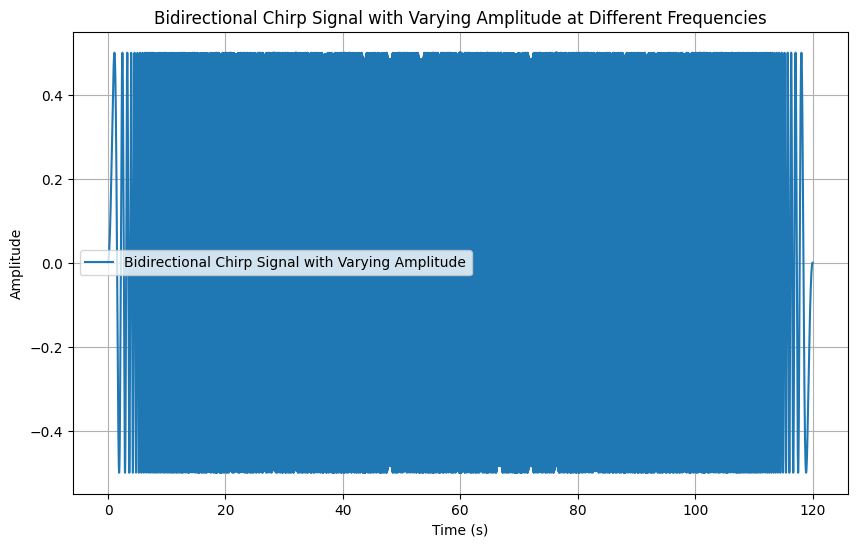

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
start_freq = 0  # Starting frequency in Hz
end_freq = 25  # Ending frequency in Hz
duration = 120  # Duration of the signal in seconds
fs = 200  # Sampling frequency in Hz (corresponds to 5ms sampling rate)
half_duration = duration / 2  # Duration of half the signal

# Generate time arrays for the full duration
t_full = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Frequencies for the first and second halves
frequencies_first_half = np.linspace(start_freq, end_freq, int(half_duration * fs))
frequencies_second_half = np.linspace(end_freq, start_freq, int(half_duration * fs))

# Full frequency sweep (increasing then decreasing)
frequencies_full = np.concatenate((frequencies_first_half, frequencies_second_half))

# Generate the bidirectional chirp signal
chirp_signal = np.sin(2 * np.pi * np.cumsum(frequencies_full) / fs)

amplitudes = [1.0, 1.0, 1.0]
x = 0.5
amplitudes = [a * x for a in amplitudes]

# Amplitude variations
amplitude = np.piecewise(t_full,
                         [t_full < half_duration / 2,
                          (t_full >= half_duration / 2) & (t_full < duration - half_duration / 2),
                          t_full >= duration - half_duration / 2],
                         amplitudes)

# Apply amplitude variations to the chirp signal
chirp_signal_amplitude_varied = chirp_signal * amplitude

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_full, chirp_signal_amplitude_varied, label="Bidirectional Chirp Signal with Varying Amplitude")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Bidirectional Chirp Signal with Varying Amplitude at Different Frequencies")
plt.legend()
plt.grid(True)
plt.show()


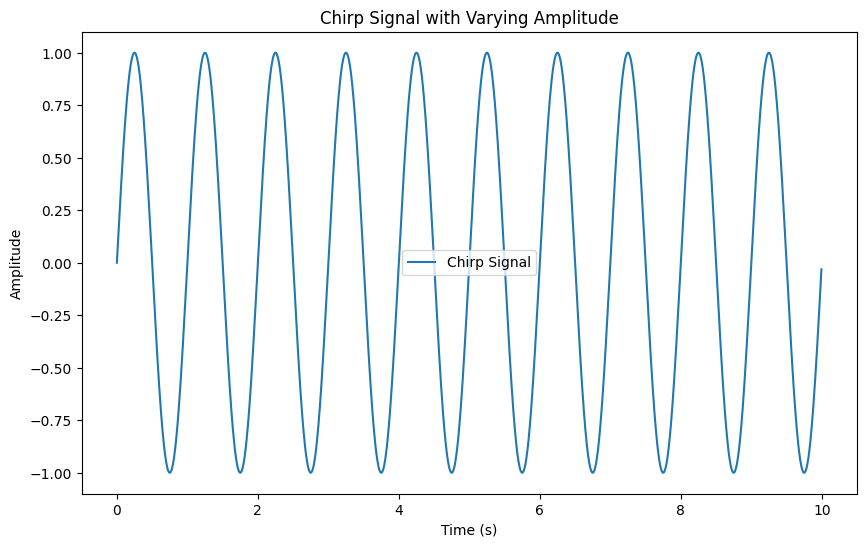

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(time, np.sin(2*np.pi*1 * time), label='Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Chirp Signal with Varying Amplitude')
plt.legend()
plt.show()